在这之前先读取10X数据

In [1]:
library(Seurat)
library(dplyr)
library(patchwork)
# library(readr)
library(ggplot2)
#有云服务器的，可开启并运算，这里我用4个线程：
library(future)
library(qs)
# check the current active plan
plan()
# change the current plan to access parallelization
plan("multisession", workers =40)
plan()

#设置可用的内存
# options(future.globals.maxSize = 4 * 1024^3)
plan("sequential")
future::plan()

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.7.3 but the current
version is 1.7.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.27.3. Announcement: https://github.com/qsbase/qs/issues/103



sequential:
- args: function (..., envir = parent.frame(), workers = "<NULL>")
- tweaked: FALSE
- call: plan(sequential)
FutureBackend to be launched

multisession:
- args: function (..., workers = 40)
- tweaked: TRUE
- call: plan("multisession", workers = 40)
MultisessionFutureBackend:
Inherits: ClusterFutureBackend, MultiprocessFutureBackend, FutureBackend
UUID: 7510abeb55f123de9a1ee7ee0c18150a
Number of workers: 40
Number of free workers: 40
Available cores: 80
Automatic garbage collection: FALSE
Early signaling: FALSE
Interrupts are enabled: TRUE
Maximum total size of globals: +Inf
Maximum total size of value: +Inf
Argument ‘rscript_libs’: "/home/guoliming/micromamba/envs/R4.4.3/lib/R/library"
Argument ‘persistent’: FALSE
Argument ‘wait.timeout’: 86400
Argument ‘wait.interval’: 0.01
Argument ‘wait.alpha’: 1.01
Argument ‘hooks’: FALSE
Number of active futures: 0
Number of futures since start: 0 (0 created, 0 launched, 0 finished)
Total runtime of futures: 0 secs (NaN secs/finished future)
Workers of type RichSOCKcluster:
- Summary: Socket cluster with 40 nodes on host ‘localhost’ (R version 4.4.3 (2025-02-28), platform x86_64-conda-linux-gnu)
- [ OK ] Node 1/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 20047 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #5 ('<-localhost:11836')]
- [ OK ] Node 2/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 20064 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #6 ('<-localhost:11836')]
- [ OK ] Node 3/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 20073 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #7 ('<-localhost:11836')]
- [ OK ] Node 4/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 20065 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #8 ('<-localhost:11836')]
- [ OK ] Node 5/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 20085 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #9 ('<-localhost:11836')]
- [ OK ] Node 6/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 20070 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #10 ('<-localhost:11836')]
- [ OK ] Node 7/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 20063 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #11 ('<-localhost:11836')]
- [ OK ] Node 8/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 20043 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #12 ('<-localhost:11836')]
- [ OK ] Node 9/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 20049 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #13 ('<-localhost:11836')]
- [ OK ] Node 10/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 20046 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #14 ('<-localhost:11836')]
- [ OK ] Node 11/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 20057 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #15 ('<-localhost:11836')]
- [ OK ] Node 12/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 20081 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #16 ('<-localhost:11836')]
- [ OK ] Node 13/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 20058 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #17 ('<-localhost:11836')]
- [ OK ] Node 14/40: valid connection, alive [RichSOCKnode of a

sequential:
- args: function (..., envir = parent.frame(), workers = "<NULL>")
- tweaked: FALSE
- call: plan("sequential")
SequentialFutureBackend:
Inherits: FutureBackend
UUID: 503e92371515cc852e474bb128c78e85
Number of workers: 1
Number of free workers: 1
Available cores: 80
Automatic garbage collection: FALSE
Early signaling: FALSE
Interrupts are enabled: TRUE
Maximum total size of globals: +Inf
Maximum total size of value: +Inf
Argument ‘hooks’: FALSE
Number of active futures: 0
Number of futures since start: 0 (0 created, 0 launched, 0 finished)
Total runtime of futures: 0 secs (NaN secs/finished future)

### 质量控制并确定变异基因

In [2]:
# qread速度很快
library(qs)
system.time({
    seurat.data = qread(file = "./Outdata/Step3.Cluster_annotion.qs")
           })

   user  system elapsed 
  4.475   1.459   5.936 

In [3]:
table(seurat.data@meta.data$celltype)


            B cells   Endothelial cells    Epithelial cells          Fibroblast 
               2645                2617                1288                2987 
         Macrophage         Neutrophils            NK cells Other Myeloid cells 
               7239                8215                3641                2434 
          Platelets Smooth muscle cells             T cells 
                224                 384                2895 

In [4]:
## 只选择一部分数据
seurat.data = subset(seurat.data, celltype %in% c("Endothelial cells"))

In [5]:
#使用PercentageFeatureSet函数计算线粒体基因的百分比
seurat.data[["percent.mt"]] <- PercentageFeatureSet(object = seurat.data, pattern = "^mt-")
pdf(file="04.featureViolin.pdf",width=10,height=6)           #保存基因特征小提琴图
VlnPlot(object = seurat.data, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,group.by = "group")
dev.off()
seurat.data <- subset(x = seurat.data, subset = nFeature_RNA > 50 & percent.mt < 5)    #对数据进行过滤


Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


pdf 
  2

In [6]:
#测序深度的相关性绘图
pdf(file="04.featureCor.pdf",width=10,height=6)              #保存基因特征相关性图
plot1 <- FeatureScatter(object = seurat.data, feature1 = "nCount_RNA", feature2 = "percent.mt",pt.size=1.5,group.by = "group")
plot2 <- FeatureScatter(object = seurat.data, feature1 = "nCount_RNA", feature2 = "nFeature_RNA",,pt.size=1.5,group.by = "group")
CombinePlots(plots = list(plot1, plot2))
dev.off()


Warning message in CombinePlots(plots = list(plot1, plot2)):
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


pdf 
  2

In [7]:
#对数据进行标准化
seurat.data <- NormalizeData(object = seurat.data, normalization.method = "LogNormalize", scale.factor = 10000)
#提取那些在细胞间变异系数较大的基因
seurat.data <- FindVariableFeatures(object = seurat.data, selection.method = "vst", nfeatures = 2000)



Warning message:
“The `slot` argument of `SetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


In [8]:
seurat.data

An object of class Seurat 
34329 features across 2617 samples within 1 assay 
Active assay: RNA (34329 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, umap, harmony

In [9]:
#输出特征方差图
top10 <- head(x = VariableFeatures(object = seurat.data), 10)
pdf(file="04.featureVar.pdf",width=10,height=6)              #保存基因特征方差图
plot1 <- VariableFeaturePlot(object = seurat.data)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))
dev.off()

Warning message:
“The `selection.method` argument of `HVFInfo()` is deprecated as of SeuratObject
5.0.0.
ℹ Please use the `method` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in CombinePlots(plots = list(plot1, plot2)):
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


pdf 
  2

In [10]:
pcSelect=20

##PCA分析
seurat.data=ScaleData(seurat.data)                     #PCA降维之前的标准预处理步骤
seurat.data=RunPCA(object= seurat.data,npcs = pcSelect,pc.genes=VariableFeatures(object = seurat.data))     #PCA分析


Centering and scaling data matrix



PC_ 1 
Positive:  Sdpr, Sepp1, Ptrf, Gnb2l1, Tmem2, Prkcdbp, Wbp5, Hn1, Fam198b, Cyp1a1 
	   Clu, Tm4sf1, Igfbp7, Ednrb, Fibin, Stmn1, Cyr61, 2700094K13Rik, Apln, Igfbp4 
	   Kitl, Ctgf, Ltbp4, Sult1a1, Cd300lg, Flt4, Fam3c, Eln, Gucy1b3, Serpinb6b 
Negative:  Samsn1, Clec4d, Pik3ap1, Plek, Lilrb4a, Cd44, Cd80, Il1b, Cxcl2, Slc7a11 
	   Dock2, Fyb, Rab11fip1, Dennd4a, Itgam, Nlrp3, Arg2, Bcl2a1b, Irak2, Il1rn 
	   Cd14, Mir142hg, Diaph2, Lilr4b, Tnfrsf1b, Cd53, C5ar1, Irak3, Sema4d, Syk 
PC_ 2 
Positive:  S100a8, Gnb2l1, S100a9, S100a6, Cd52, Tyrobp, Sdpr, Coro1a, Alox5ap, Arhgdib 
	   Sepp1, Fcer1g, Ifitm1, S100a11, Rac2, Wfdc17, Spi1, Retnlg, Fth1, Ptrf 
	   Msrb1, Cebpb, Lst1, Wfdc21, Pglyrp1, Lsp1, Ftl1, Itgb2, Cd14, Trem1 
Negative:  Arl15, Nckap5, Tmtc2, Maml2, Aff3, Prickle2, Psd3, Ghr, Plcb1, Adgrl3 
	   Dock4, Pde4d, Aopep, Ldlrad4, Sorbs1, Samd12, Fbxl7, Dach1, St6galnac3, Etv6 
	   Pakap.1, 2610307P16Rik, Cemip2, Adamts9, Sbno2, Pdlim5, Pdgfd, Mast4, Klf12, Prkg1 
PC_ 3 
Pos

In [11]:
seurat.data = seurat.data %>% 
    RunUMAP(reduction = "pca", dims = 1:pcSelect, verbose = F)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


### 去批次

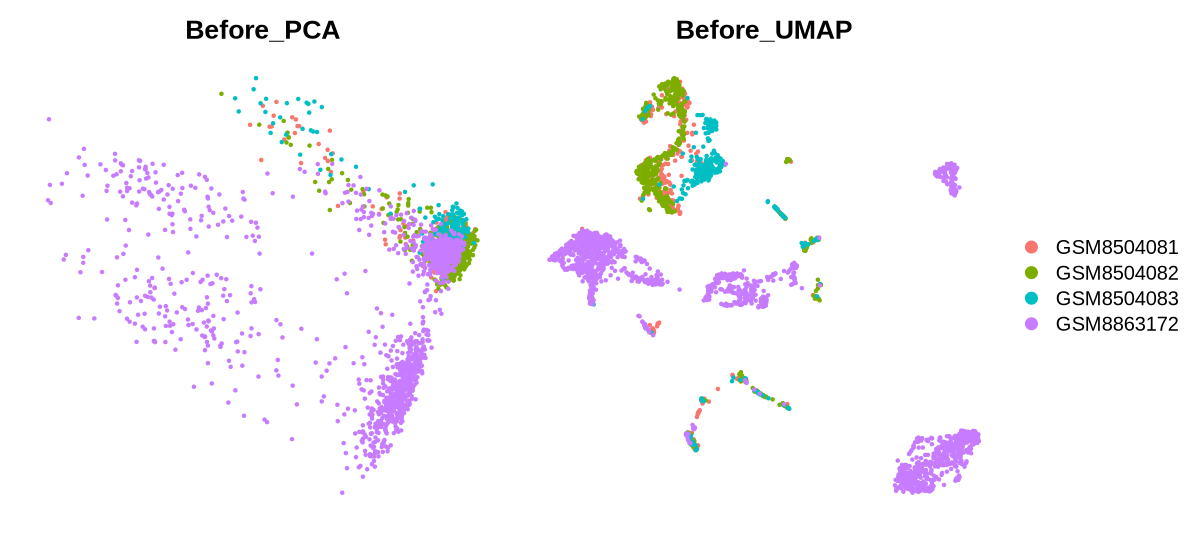

In [12]:
### 3.2 检查批次
options(repr.plot.width = 10, repr.plot.height = 4.5)
p1.compare=wrap_plots(ncol = 2,
                      DimPlot(seurat.data, reduction = "pca", group.by = "sampleID")+NoAxes()+ggtitle("Before_PCA"),
                      DimPlot(seurat.data, reduction = "umap", group.by = "sampleID")+NoAxes()+ggtitle("Before_UMAP"),
                      guides = "collect"
)
p1.compare

Loading required package: Rcpp



Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony converged after 5 iterations



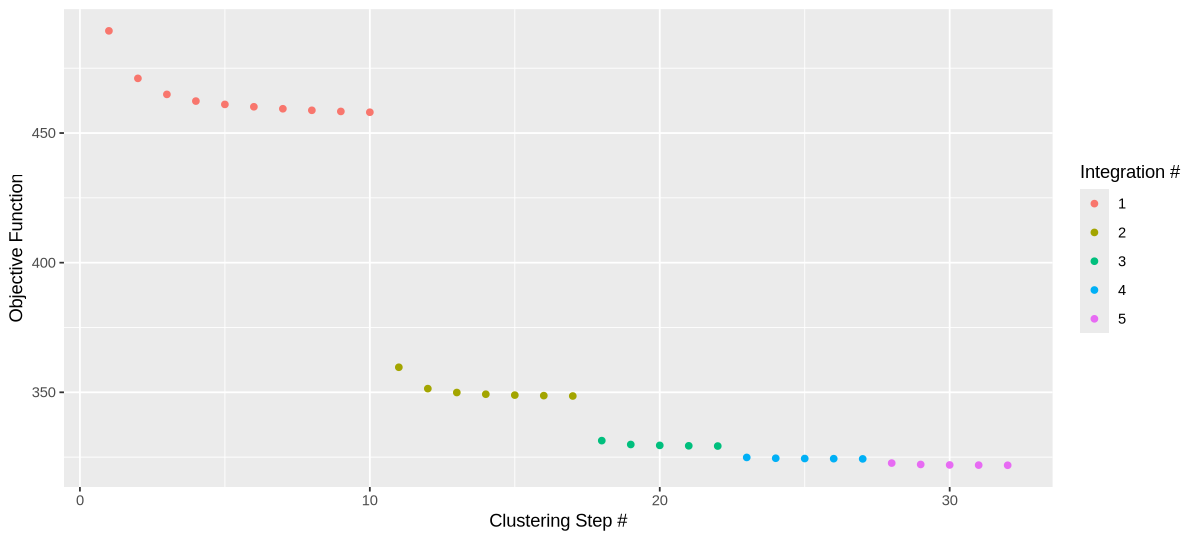

In [13]:
### 4.1 RunHarmony 小样本运行比较快
library(harmony)
seurat.data <- seurat.data %>% RunHarmony("sampleID", plot_convergence = T)

In [14]:
### 去批次之后，还需要再RunUMAP一次更新harmony
seurat.data <- seurat.data %>% 
  RunUMAP(reduction = "harmony", dims = 1:pcSelect, verbose = F)

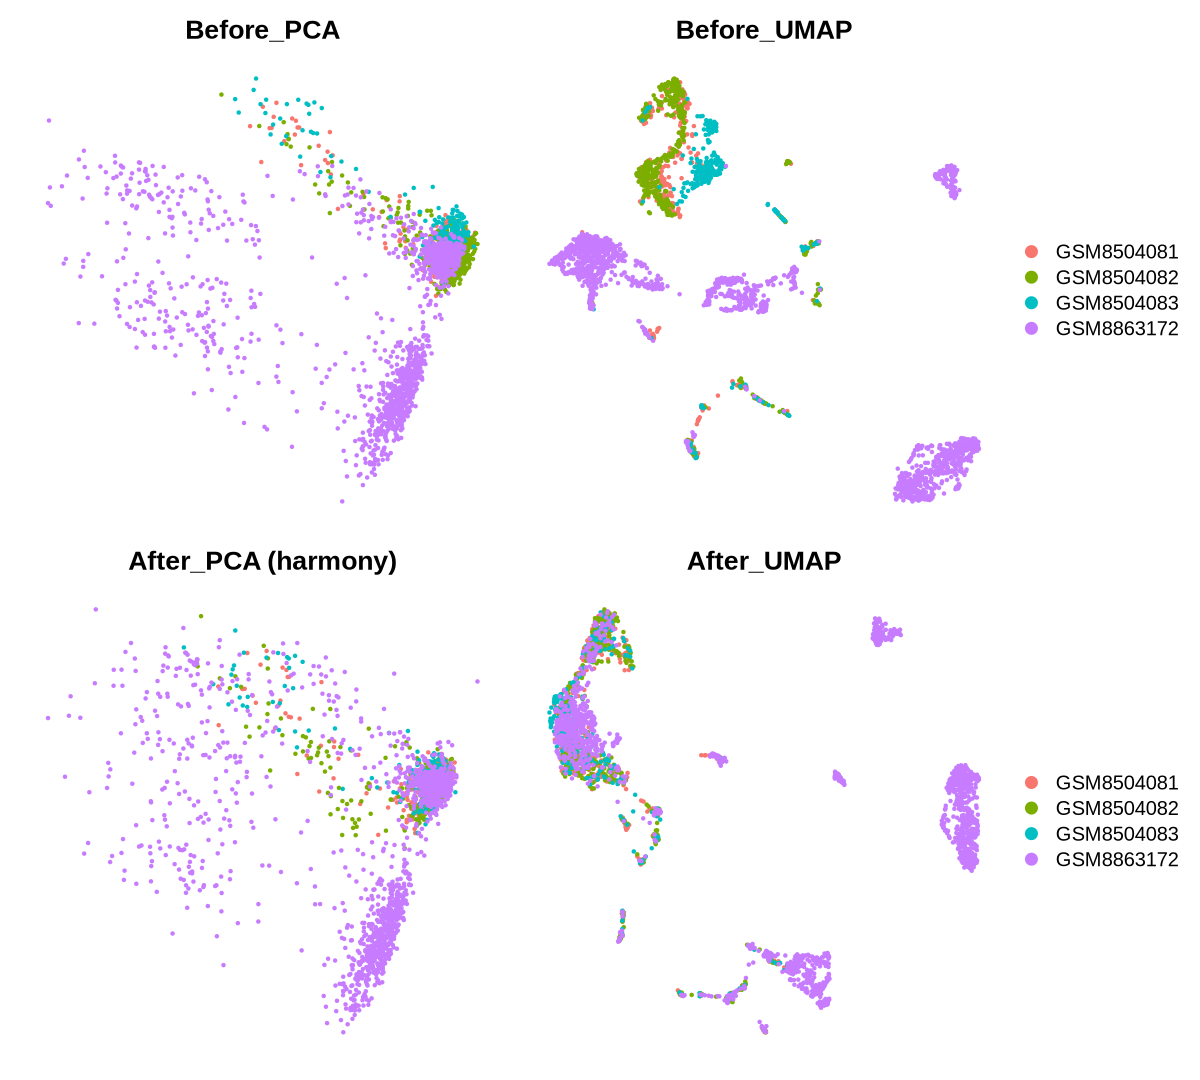

In [15]:
p2.compare=wrap_plots(ncol = 2,
                      DimPlot(seurat.data, reduction = "harmony", group.by = "sampleID")+NoAxes()+ggtitle("After_PCA (harmony)"),
                      DimPlot(seurat.data, reduction = "umap", group.by = "sampleID")+NoAxes()+ggtitle("After_UMAP"),
                      guides = "collect"
)
# p2.compare

options(repr.plot.width = 10, repr.plot.height = 9)
wrap_plots(p1.compare, p2.compare, ncol = 1)


In [16]:
pdf(file="after_hamrmony.pdf",width=10,height=9)
wrap_plots(p1.compare, p2.compare, ncol = 1)
dev.off()

pdf 
  2

### 找合适的resolution

In [17]:
# 对比多种resolution的聚类结果
seurat.data <- FindNeighbors(seurat.data,reduction = "harmony", dims = 1:pcSelect)
for (res in c(0.05,0.1,0.2,0.3,0.5,0.8,1,1.2,1.4,1.5,2)){
  print(res)
  seurat.data <- FindClusters(seurat.data,resolution = res, algorithm = 1)
}

Computing nearest neighbor graph



Computing SNN



[1] 0.05
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2617
Number of edges: 101728

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9798
Number of communities: 6
Elapsed time: 0 seconds
[1] 0.1
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2617
Number of edges: 101728

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9691
Number of communities: 10
Elapsed time: 0 seconds
[1] 0.2
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2617
Number of edges: 101728

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9515
Number of communities: 10
Elapsed time: 0 seconds
[1] 0.3
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2617
Number of edges: 101728

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9342
Number of communities: 13
Elapsed 

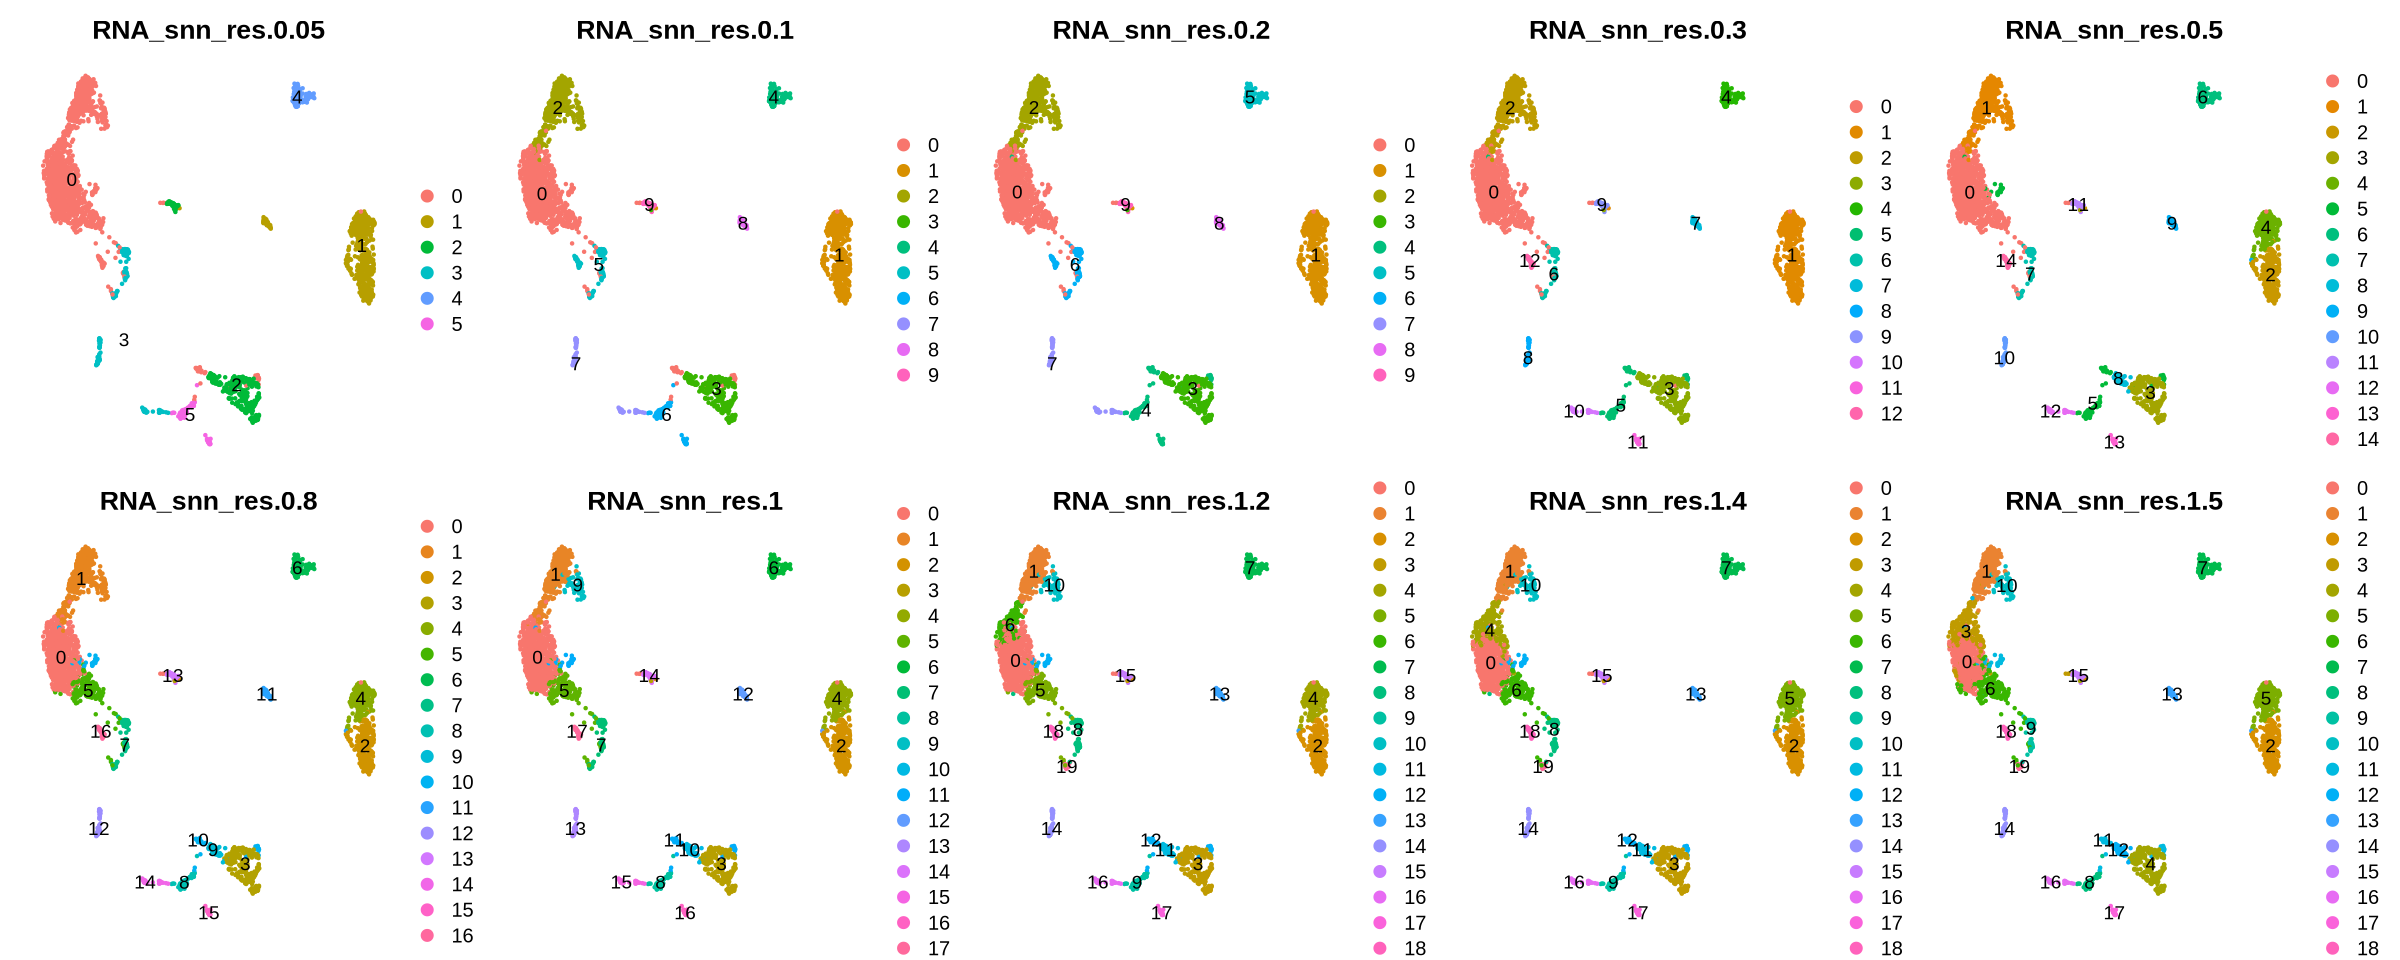

In [18]:
options(repr.plot.width = 20, repr.plot.height = 8)
#umap可视化
cluster_umap <- wrap_plots(ncol = 5,
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.05", label = T) & NoAxes(),  
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.1", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.2", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.3", label = T)& NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.5", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.8", label = T) & NoAxes(), 
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1.2", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1.4", label = T)& NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1.5", label = T)& NoAxes()
)
cluster_umap

In [19]:
Idents(seurat.data) <- seurat.data@meta.data$RNA_snn_res.0.2

In [20]:
pdf(file="07.Umap_0.2.pdf",width=6.5,height=6)
# 默认用seurat_clusters列（最后一次聚类得到的列）
DimPlot(seurat.data, reduction = "umap", label = TRUE) & NoAxes()
dev.off()

pdf 
  2

In [21]:
#qs速度快
#install.packages('qs')
library(qs)
system.time({
    qsave(seurat.data,file = "./Outdata/Cluster_no_annotion_End.qs") 
})

   user  system elapsed 
  1.087   0.092   1.180 

## 按照差异基因0.2的清晰度聚类

In [22]:
# qread速度很快
library(qs)
system.time({
    seurat.data = qread(file = "./Outdata/Cluster_no_annotion_End.qs")
           })

   user  system elapsed 
  0.325   0.071   0.398 

In [23]:
head(seurat.data@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sampleID,group,percent.mt,RNA_snn_res.0.05,seurat_clusters,RNA_snn_res.0.1,RNA_snn_res.0.2,RNA_snn_res.0.3,RNA_snn_res.0.5,RNA_snn_res.0.8,RNA_snn_res.1,RNA_snn_res.1.2,RNA_snn_res.1.4,RNA_snn_res.1.5,RNA_snn_res.2,celltype
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
GSM8504081_AAAGAACAGACCATAA-1,GSM8504081,2947,1542,GSM8504081,ALI,4.988124,0,2,0,0,0,0,0,0,0,0,0,2,Endothelial cells
GSM8504081_AAAGGGCGTTTCCCAC-1,GSM8504081,6489,2551,GSM8504081,ALI,4.808137,0,12,2,2,2,1,1,9,10,10,10,12,Endothelial cells
GSM8504081_AAAGTGAGTGATTAGA-1,GSM8504081,3526,1674,GSM8504081,ALI,4.594441,0,0,2,2,2,1,1,1,1,1,1,0,Endothelial cells
GSM8504081_AAAGTGAGTTTCGGCG-1,GSM8504081,4208,2046,GSM8504081,ALI,3.279468,0,0,2,2,2,1,1,1,1,1,1,0,Endothelial cells
GSM8504081_AAATGGATCCATCAGA-1,GSM8504081,3471,1808,GSM8504081,ALI,4.494382,0,3,0,0,2,1,1,1,6,4,3,3,Endothelial cells
GSM8504081_AACAAGATCGAGTACT-1,GSM8504081,8225,2686,GSM8504081,ALI,4.875380,3,13,5,6,6,7,7,7,8,8,9,13,Endothelial cells


In [24]:
Idents(seurat.data) <- seurat.data@meta.data$RNA_snn_res.0.2

In [25]:
##寻找差异表达的特征
log2FCfilter=1 # 表示2的1次方，即相差两倍
adjPvalFilter=0.05

In [26]:

seurat.data.markers <- FindAllMarkers(object = seurat.data,
                               only.pos = FALSE,
                               min.pct = 0.25,
                               logfc.threshold = log2FCfilter)


Calculating cluster 0



For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [27]:
# 选择前3个基因z作为每个cluster的标志基因
top3 <- seurat.data.markers %>% group_by(cluster) %>% top_n(n = 3, wt = avg_log2FC)


In [28]:
#绘制差异基因在各个细胞类型的热图（图片有问题）
pdf(file="06.tsneHeatmap.pdf",width=20,height=12)
DoHeatmap(seurat.data, features = top3$gene, group.by = "RNA_snn_res.0.2")
dev.off()

Warning message in DoHeatmap(seurat.data, features = top3$gene, group.by = "RNA_snn_res.0.2"):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: Emp2, Gpihbp1”


pdf 
  2

In [29]:
save(seurat.data.markers,
     file = "Step6.celltype.markers.0.2.Rdata")

In [32]:
# # 重新加载数据
# load("Step6.celltype.markers.0.2.Rdata")

In [31]:
sig.markers=seurat.data.markers[(abs(as.numeric(as.vector(seurat.data.markers$avg_log2FC)))>log2FCfilter & as.numeric(as.vector(seurat.data.markers$p_val_adj))<adjPvalFilter),]
write.table(sig.markers,file="06.markers.xls",sep="\t",row.names=F,quote=F)


In [32]:
head(sig.markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Elmo1,3.820416e-139,-1.680327,0.158,0.696,1.311511e-134,0,Elmo1
Aff3,4.303997e-105,-1.971445,0.105,0.546,1.477519e-100,0,Aff3
Dock4,9.879518e-104,-1.659848,0.076,0.519,3.391540e-99,0,Dock4
Arhgef3,3.179391e-96,-1.353996,0.283,0.721,1.091453e-91,0,Arhgef3
Fmnl2,1.594005e-93,-1.361908,0.204,0.656,5.472060e-89,0,Fmnl2
Psd3,5.240997e-93,-1.643479,0.089,0.501,1.799182e-88,0,Psd3


### 主要细胞类型注释

In [33]:
# 读取未注释的数据
seurat.data = qread(file = "./Outdata/Cluster_no_annotion_End.qs")

In [34]:
# # 将 RNA 表达矩阵的基因名称转换为大写
# rownames(seurat.data@assays$RNA@counts) = toupper(rownames(seurat.data@assays$RNA@counts))
# rownames(seurat.data@assays$RNA@data) = toupper(rownames(seurat.data@assays$RNA@data))

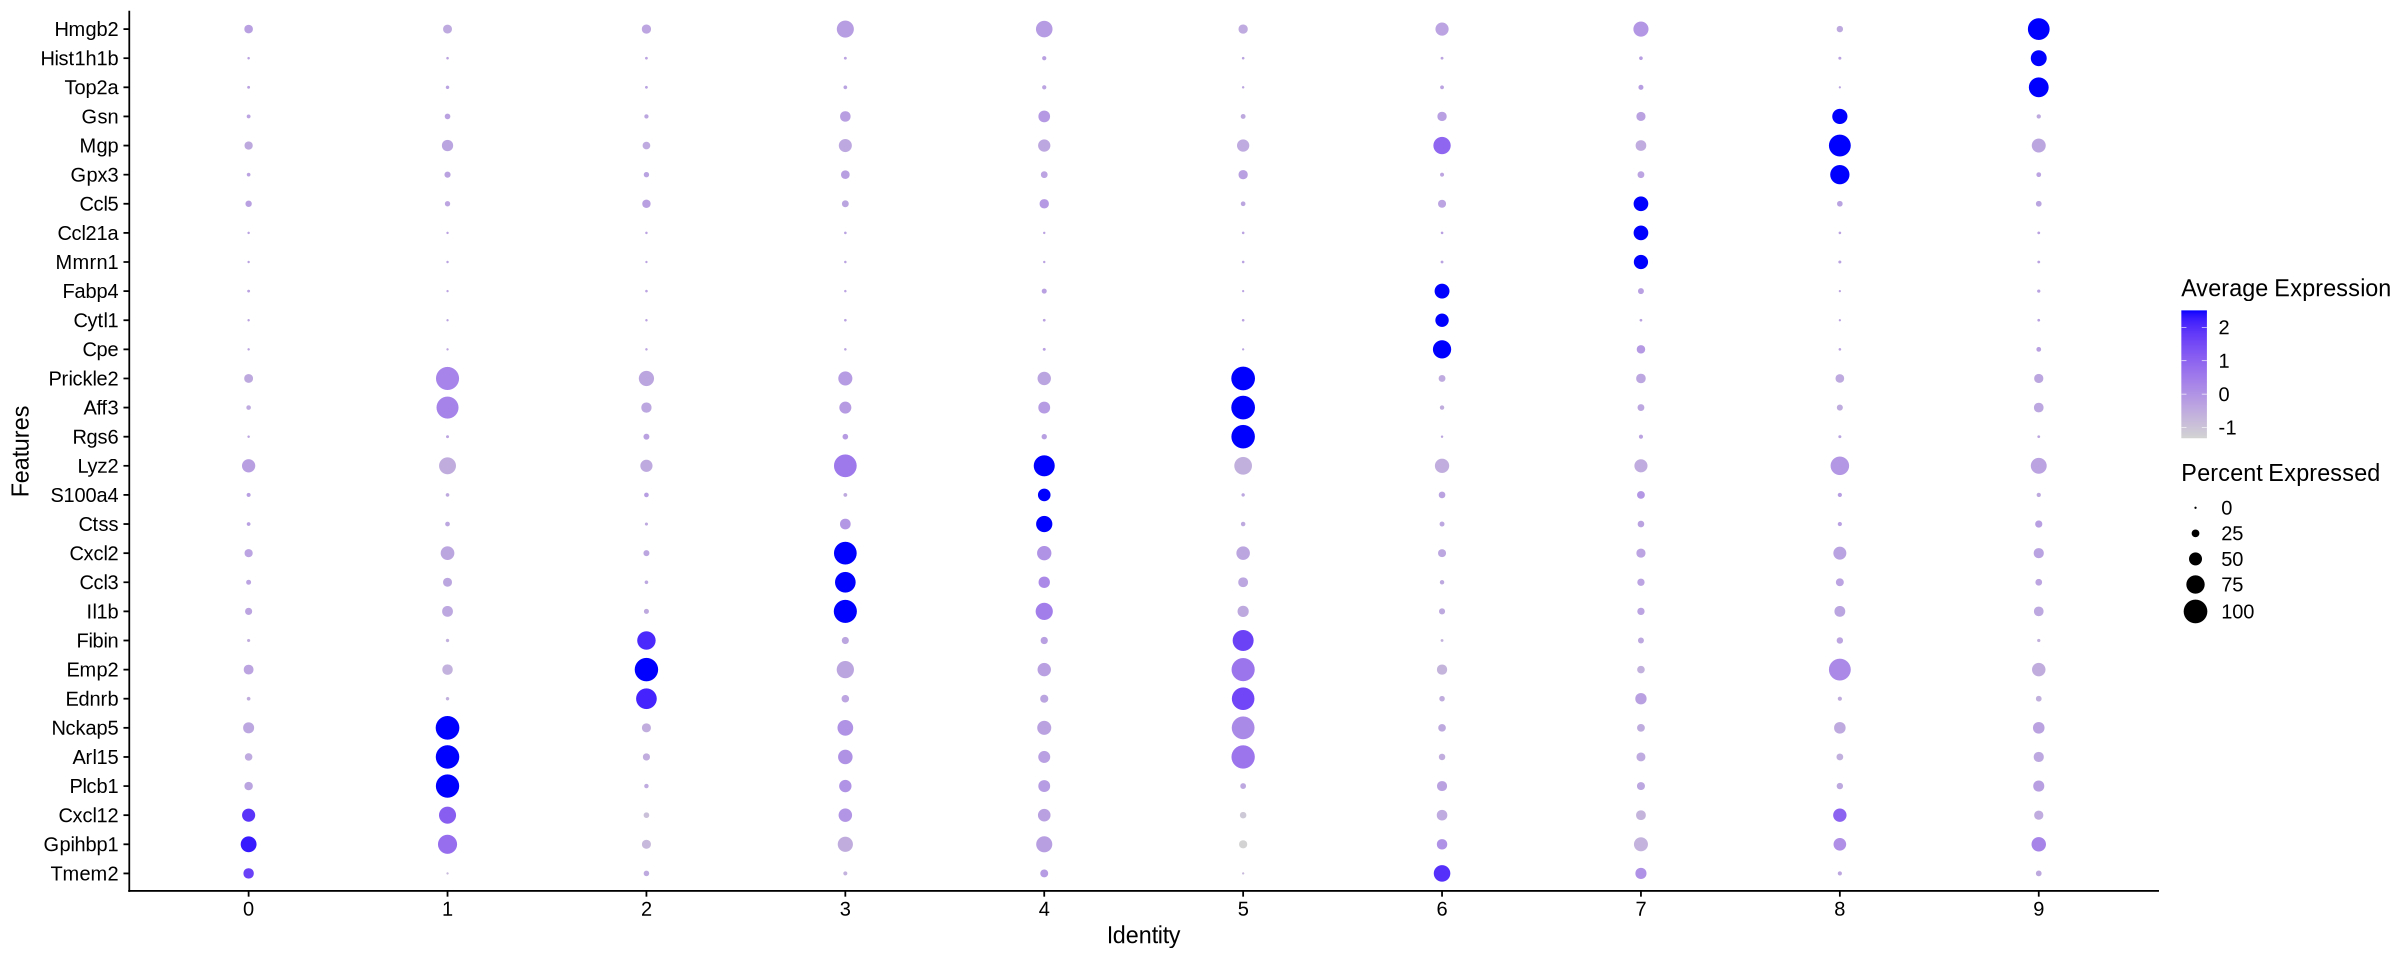

In [35]:
# 默认seurat_clusters列为RNA_snn_res.0.2
unique_genes <- unique(top3$gene)
Idents(seurat.data) <- seurat.data@meta.data$RNA_snn_res.0.2
check_genes = unique_genes



DotPlot(object = seurat.data, features = check_genes, 
        assay = "RNA",scale = T) + coord_flip()

In [36]:
pdf(file="Cluster_End.pdf",width=12,height=10)
DotPlot(object = seurat.data, features = check_genes, 
        assay = "RNA",scale = T) + coord_flip()
dev.off()

pdf 
  2

In [37]:
unique_genes

[1] "Tmem2"    "Gpihbp1"  "Cxcl12"   "Plcb1"    "Arl15"    "Nckap5"  
 [7] "Ednrb"    "Emp2"     "Fibin"    "Il1b"     "Ccl3"     "Cxcl2"   
[13] "Ctss"     "S100a4"   "Lyz2"     "Rgs6"     "Aff3"     "Prickle2"
[19] "Cpe"      "Cytl1"    "Fabp4"    "Mmrn1"    "Ccl21a"   "Ccl5"    
[25] "Gpx3"     "Mgp"      "Gsn"      "Top2a"    "Hist1h1b" "Hmgb2"

In [38]:


###分配细胞名称
celltype=data.frame(ClusterID=0:9,celltype='NA')

## Neutrophils_c1
celltype[celltype$ClusterID %in% c(0),2]='Endothelial_c0' #CRL

## Endothelial
celltype[celltype$ClusterID %in% c(1),2]='Endothelial_c1' #CRL

## Endothelial_cells
celltype[celltype$ClusterID %in% c(2),2]='Endothelial_c2' #CRL

## B_cells
celltype[celltype$ClusterID %in% c(3),2]='Endothelial_c3' # 还有毒性T细胞 #CRL

## Smooth muscle cells
celltype[celltype$ClusterID %in% c(4),2]='Endothelial_c4' #CRL

## Smooth muscle cells
celltype[celltype$ClusterID %in% c(5),2]='Endothelial_c5' #CRL

## Smooth muscle cells
celltype[celltype$ClusterID %in% c(6),2]='Endothelial_c6' #CRL

## Smooth muscle cells
celltype[celltype$ClusterID %in% c(7),2]='Endothelial_c7' #CRL

## Smooth muscle cells
celltype[celltype$ClusterID %in% c(8),2]='Endothelial_c8' #CRL

## Smooth muscle cells
celltype[celltype$ClusterID %in% c(9),2]='Endothelial_c9' #CRL


colnames(celltype) = c("ClusterID","celltype_main")
seurat.data@meta.data$celltype = "NA"
for(i in 1:nrow(celltype)){
  seurat.data@meta.data[which(seurat.data@active.ident == celltype$ClusterID[i]),'celltype'] <- celltype$celltype[i]}
table(seurat.data@meta.data$celltype)


Endothelial_c0 Endothelial_c1 Endothelial_c2 Endothelial_c3 Endothelial_c4 
           895            462            409            287            135 
Endothelial_c5 Endothelial_c6 Endothelial_c7 Endothelial_c8 Endothelial_c9 
           118            114             95             58             44 

In [39]:
pdf(file="Sub_End_Umap_annotion_0.2.pdf",width=12,height=10)
DimPlot(seurat.data, reduction = "umap", group.by = "celltype", label = T)& NoAxes()
dev.off()

pdf 
  2

In [40]:
head(seurat.data@meta.data)
Idents(seurat.data) <- seurat.data@meta.data$celltype
table(seurat.data@meta.data$celltype)

,orig.ident,nCount_RNA,nFeature_RNA,sampleID,group,percent.mt,RNA_snn_res.0.05,seurat_clusters,RNA_snn_res.0.1,RNA_snn_res.0.2,RNA_snn_res.0.3,RNA_snn_res.0.5,RNA_snn_res.0.8,RNA_snn_res.1,RNA_snn_res.1.2,RNA_snn_res.1.4,RNA_snn_res.1.5,RNA_snn_res.2,celltype
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
GSM8504081_AAAGAACAGACCATAA-1,GSM8504081,2947,1542,GSM8504081,ALI,4.988124,0,2,0,0,0,0,0,0,0,0,0,2,Endothelial_c0
GSM8504081_AAAGGGCGTTTCCCAC-1,GSM8504081,6489,2551,GSM8504081,ALI,4.808137,0,12,2,2,2,1,1,9,10,10,10,12,Endothelial_c2
GSM8504081_AAAGTGAGTGATTAGA-1,GSM8504081,3526,1674,GSM8504081,ALI,4.594441,0,0,2,2,2,1,1,1,1,1,1,0,Endothelial_c2
GSM8504081_AAAGTGAGTTTCGGCG-1,GSM8504081,4208,2046,GSM8504081,ALI,3.279468,0,0,2,2,2,1,1,1,1,1,1,0,Endothelial_c2
GSM8504081_AAATGGATCCATCAGA-1,GSM8504081,3471,1808,GSM8504081,ALI,4.494382,0,3,0,0,2,1,1,1,6,4,3,3,Endothelial_c0
GSM8504081_AACAAGATCGAGTACT-1,GSM8504081,8225,2686,GSM8504081,ALI,4.875380,3,13,5,6,6,7,7,7,8,8,9,13,Endothelial_c6



Endothelial_c0 Endothelial_c1 Endothelial_c2 Endothelial_c3 Endothelial_c4 
           895            462            409            287            135 
Endothelial_c5 Endothelial_c6 Endothelial_c7 Endothelial_c8 Endothelial_c9 
           118            114             95             58             44 

In [41]:
## 2.5 保存数据
qsave(seurat.data, file = "./Outdata/Sub_End_annotion.qs")

### 按照指定细胞类型顺序绘制Marker基因图

In [43]:
# 默认seurat_clusters列为RNA_snn_res.0.2
unique_genes <- unique(top3$gene)
Idents(seurat.data) <- seurat.data@meta.data$RNA_snn_res.0.2
check_genes = unique_genes

# 按照指定顺序定义因子水平
celltype_order <- c(
  "Endothelial_c0",
  "Endothelial_c1",
  "Endothelial_c2",
  "Endothelial_c3",
  "Endothelial_c4",
  "Endothelial_c5",
  "Endothelial_c6",
  "Endothelial_c7",
  "Endothelial_c8",
  "Endothelial_c9"
)
# 确保 celltype 列为因子
seurat.data$celltype <- factor(seurat.data$celltype, levels = celltype_order)

# DotPlot
p <- DotPlot(
    seurat.data, 
    features = check_genes, 
    assay = "RNA", 
    scale = TRUE,
    group.by = "celltype"
) + 
  coord_flip() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 保存
pdf(file="06.markerBubble.reordered.pdf", width=10, height=10)
print(p)
dev.off()


pdf 
  2

In [ ]:


# # 绘制marker的小提琴图
# pdf(file="06.markerViolin.pdf",width=10,height=6)
# VlnPlot(object = seurat.data, features = c("Gzma","Ccl5"))
# dev.off()


# #绘制marker在各个cluster的散点图
# pdf(file="06.markerScatter.pdf",width=10,height=6)
# FeaturePlot(object = seurat.data, features = c("Gzma","Ccl5"),cols = c("green", "red"))
# dev.off()

# #绘制marker在各个cluster的气泡图
# pdf(file="06.markerBubble.pdf",width=12,height=6)
# cluster10Marker=c("Gzma","Ccl5")
# DotPlot(object = seurat.data, features = cluster10Marker)
# dev.off()


pdf 
  2

pdf 
  2

### 计算每个cluster的marker基因

### 富集分析

基因SYMBOL转GENE ID(富集的前提)

In [31]:
# 重新加载数据
load("Step6.celltype.markers.0.2.Rdata")

In [32]:
##寻找差异表达的特征
log2FCfilter=1 # 表示2的1次方，即相差两倍
adjPvalFilter=0.05

head(seurat.data.markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Elmo1,3.820416e-139,-1.680327,0.158,0.696,1.311511e-134,0,Elmo1
Aff3,4.303997e-105,-1.971445,0.105,0.546,1.477519e-100,0,Aff3
Dock4,9.879518e-104,-1.659848,0.076,0.519,3.391540e-99,0,Dock4
Arhgef3,3.179391e-96,-1.353996,0.283,0.721,1.091453e-91,0,Arhgef3
Fmnl2,1.594005e-93,-1.361908,0.204,0.656,5.472060e-89,0,Fmnl2
Psd3,5.240997e-93,-1.643479,0.089,0.501,1.799182e-88,0,Psd3


In [33]:
sig.markers=seurat.data.markers[(abs(as.numeric(as.vector(seurat.data.markers$avg_log2FC)))>log2FCfilter & as.numeric(as.vector(seurat.data.markers$p_val_adj))<adjPvalFilter),]


In [34]:
library("org.Mm.eg.db")          #引用包小鼠
# rt=read.table("symbol.txt",sep="\t",check.names=F,header=T)    #读取文件
genes=as.vector(sig.markers[,7])
entrezIDs <- mget(genes, org.Mm.egSYMBOL2EG, ifnotfound=NA)    #找出基因对应的id
entrezIDs <- as.character(entrezIDs)
sig.markers_entrezIDs=cbind(sig.markers,entrezID=entrezIDs)
write.table(sig.markers_entrezIDs,file="./shengxinzixue/id.txt",sep="\t",quote=F,row.names=F)    #输出结果

In [35]:
table(sig.markers_entrezIDs$cluster)


  0   1   2   3   4   5   6   7   8   9 
101 367 207 322  87 294 242 204  61 125 

### 生信自学GO富集（Unknown类）

In [36]:
### 选择cluster为0的亚群进行富集分析
library("clusterProfiler")


In [37]:
sig.markers_entrezIDs <- subset(sig.markers_entrezIDs, cluster == 4) 
 
sig.markers_entrezIDs=sig.markers_entrezIDs[is.na(sig.markers_entrezIDs[,"entrezID"])==F,]                                 #去除基因id为NA的基因
gene=sig.markers_entrezIDs$entrezID

#GO富集分析
kk <- enrichGO(gene = gene,
               OrgDb = org.Mm.eg.db, 
               pvalueCutoff =0.05, 
               qvalueCutoff = 0.05,
               ont="all",
               readable =T)
write.table(kk,file="./shengxinzixue/GO_c4.txt",sep="\t",quote=F,row.names = F)                 #保存富集结果

In [38]:
library(enrichplot)
library(ggplot2)
library(grid)  # 用于 unit()

# 输出 PDF
pdf(file="GO_barplot_c4.pdf", width=10, height=20)

# 绘图
barplot(kk,
        drop = TRUE,
        showCategory = 10,  #控制柱子的数量
        split = "ONTOLOGY") +
  facet_grid(ONTOLOGY ~ ., scales = "free") +   # 注意是 scales = "free"
  theme_minimal() +  # 可以换成 theme_bw() 或 theme_classic() 根据喜好
  theme(
    axis.text.x = element_text(color = "black", size = 16, angle = 45, hjust = 1), # x轴文字旋转更美观
    axis.text.y = element_text(color = "black", size = 16),
    axis.title = element_text(color = "black", size = 20),
    strip.text.y = element_text(color = "black", size = 20),  # 分面标签
    legend.text = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.key.size = unit(1, "cm")
  )

dev.off()


agg_record_204353718 
                   2

In [39]:
pdf(file="GO_bubble_c4.pdf", width = 10, height = 15)

dotplot(kk, showCategory = 10, split = "ONTOLOGY") +
  facet_grid(ONTOLOGY ~ ., scale = "free") +
  theme(
    axis.text.x = element_text(color = "black", size = 16),   # x轴文字
    axis.text.y = element_text(color = "black", size = 16),   # y轴文字
    strip.text.y = element_text(color = "black", size = 20),  # 分面标签
    axis.title  = element_text(color = "black", size = 20),   # 坐标轴标题
    legend.text = element_text(size = 16),                    # 图例文字
    legend.title= element_text(size = 16),                    # 图例标题
    legend.key.size = unit(1, "cm")                           # 图例方块大小
  )

dev.off()


agg_record_846718927 
                   2

生信自学KEGG

In [40]:
#kegg富集分析
kk <- enrichKEGG(gene = gene,
                 organism = "mmu",
                 pvalueCutoff = 0.05,
                 qvalueCutoff = 0.05)

write.table(kk,file="./shengxinzixue/KEGGId.txt",sep="\t",quote=F,row.names = F)                          #保存富集结果

In [41]:
#柱状图
pdf(file="KEGG_barplot_c4.pdf",width = 10,height = 20)
# options(repr.plot.width = 10, repr.plot.height = 15)
barplot(kk, drop = TRUE, showCategory = 30) +
  theme(
    axis.text.x = element_text(color = "black", size = 16),  # x轴文字
    axis.text.y = element_text(color = "black", size = 16),    # y轴文字
    strip.text.y = element_text(color = "black", size = 20),  # 分面标签
    axis.title = element_text(color = "black", size = 20) # 坐标轴标题
  )+
    theme(
    legend.text = element_text(size = 16),   # 图例文字大小
    legend.title = element_text(size = 16),  # 图例标题大小
    legend.key.size = unit(1, "cm")          # 图例方块大小
  )

dev.off()



agg_record_1571134724 
                    2

In [42]:
pdf(file="KEGG_bubble_c4.pdf", width = 10, height = 20)

dotplot(kk, showCategory = 30) +
  theme(
    axis.text.x = element_text(color = "black", size = 16),   # x轴文字
    axis.text.y = element_text(color = "black", size = 16),   # y轴文字
    strip.text.y = element_text(color = "black", size = 20),  # 分面标签
    axis.title  = element_text(color = "black", size = 20),   # 坐标轴标题
    legend.text = element_text(size = 16),                    # 图例文字
    legend.title= element_text(size = 16),                    # 图例标题
    legend.key.size = unit(1, "cm")                           # 图例方块大小
  )

dev.off()


agg_record_1560371593 
                    2